In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time


In [104]:
df_activities = pd.read_csv('/Users/nickx/Documents/school_work/21FA/info_664_pfch/pfch_final_project/strava_activities_all_fields.csv')

df_runs = df_activities[df_activities['type'] == 'Run']
df_runs.head(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,average_temp,max_watts,weighted_average_watts
0,0,2,Long run,22105.2,7208,7328,135.9,Run,0.0,6283890938,...,1,a6283890938,g~iwFhnnbM}Iz@}Ez@sCHmEz@gEHuAZi@Is@Z_D^g@X}@G...,2,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Recovery run,6061.1,2125,2363,46.5,Run,0.0,6276813009,...,1,a6276813009,w_jwFrmnbMIBR@E@ECN?@Bk@BWEAJc@T]HGDAJ@n@ARB^A...,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Workout Wednesday,9850.0,3004,3018,0.0,Run,0.0,6272684257,...,1,a6272684257,kfpwFrujbMFA?IFDDCJFBI|@B@GhBSJIT[Je@C]O_@QQUI...,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,Morning Run,9980.3,3159,3285,100.6,Run,0.0,6265381398,...,1,a6265381398,o}iwFtmnbMADECGBACKFSEW@gBVEFQx@UdBEFSFFV?\ErB...,2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,Morning Run,9769.7,3474,3597,70.4,Run,NaN,6260936496,...,1,a6260936496,_}iwFtnnbMB@CEJO?D@IF?Ea@DBDAHJAKJEBKHD^OPC@C@...,2,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,Easy Sunday in Philly,6602.1,2269,2280,25.9,Run,0.0,6256778448,...,1,a6256778448,ubzrFtctiMH@?HDADD@Ax@JV?V?P@VOV?b@JZTLBNATeAB...,2,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2,Friday night endurance,12758.2,4410,4749,117.3,Run,0.0,6249249996,...,1,a6249249996,a~iwF`mnbMGA_@^SJIECFCKE?EFkANQJEVE~ASdADhBIb@...,2,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2,Recovery,6155.4,2306,2445,43.6,Run,0.0,6242906333,...,1,a6242906333,c}iwF|mnbMDQCBEAEHuAZ_@Fm@PO@EFCNMTEVIdACn@@LA...,2,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2,Track workout with Bryan,10120.6,2911,3141,0.0,Run,0.0,6240896496,...,1,a6240896496,oepwFhujbMFGGTPMNFJ?NM?D`@GpA_@VMXWNYLe@?]Si@[...,2,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2,Tempo,9942.7,3203,3323,101.3,Run,0.0,6233556473,...,1,a6233556473,q}iwFbnnbMIFk@Hg@Ni@?i@JGDET?n@Gh@?`AEN@REZBNS...,2,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Distance (meters)')

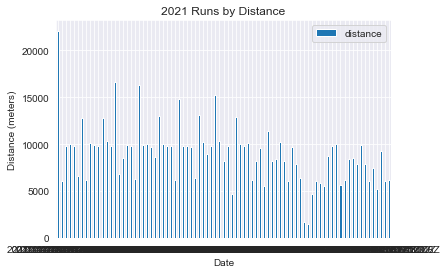

In [105]:
df_runs.plot.bar(x='start_date_local', y= 'distance', rot=0)

plt.title("2021 Runs by Distance")
plt.xlabel("Date")
plt.ylabel("Distance (meters)")

In [106]:
df_training_log = df_runs[['distance', 'start_date_local', 'average_heartrate', 'average_speed', 'average_cadence']]

In [107]:
#select only the runs since I started back after injury on May 31
df_training_log = df_training_log[(df_training_log['start_date_local'] >= '2021-05-31 00:00:00+00:00')]

In [108]:
#separating date and time into separate columns
# split column and add new columns to df
df_training_log[['date', 'time']] = df_training_log['start_date_local'].str.split('T', expand=True)
# display the dataframe
df_training_log

,distance,start_date_local,average_heartrate,average_speed,average_cadence,date,time
0,22105.2,2021-11-20T08:37:29Z,164.6,3.067,85.5,2021-11-20,08:37:29Z
1,6061.1,2021-11-18T17:05:06Z,158.3,2.852,83.0,2021-11-18,17:05:06Z
2,9850.0,2021-11-17T17:33:29Z,172.2,3.279,83.9,2021-11-17,17:33:29Z
3,9980.3,2021-11-16T07:00:21Z,165.2,3.159,86.5,2021-11-16,07:00:21Z
4,9769.7,2021-11-15T06:58:50Z,148.1,2.812,84.9,2021-11-15,06:58:50Z
...,...,...,...,...,...,...,...
122,7834.7,2021-06-22T08:13:36Z,176.6,3.060,78.8,2021-06-22,08:13:36Z
128,6103.5,2021-06-14T12:00:25Z,172.4,3.098,80.4,2021-06-14,12:00:25Z
132,7458.6,2021-06-10T07:57:00Z,172.6,2.872,75.9,2021-06-10,07:57:00Z
136,5232.0,2021-06-03T09:17:36Z,173.6,3.023,77.6,2021-06-03,09:17:36Z


In [109]:
df_training_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 139
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           81 non-null     float64
 1   start_date_local   81 non-null     object 
 2   average_heartrate  81 non-null     float64
 3   average_speed      81 non-null     float64
 4   average_cadence    81 non-null     float64
 5   date               81 non-null     object 
 6   time               81 non-null     object 
dtypes: float64(4), object(3)
memory usage: 5.1+ KB


In [110]:
#convert date column to datetime type
df_training_log['date']=pd.to_datetime(df_training_log['date'], format='%Y/%m/%d')

In [111]:
df_training_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 139
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   distance           81 non-null     float64       
 1   start_date_local   81 non-null     object        
 2   average_heartrate  81 non-null     float64       
 3   average_speed      81 non-null     float64       
 4   average_cadence    81 non-null     float64       
 5   date               81 non-null     datetime64[ns]
 6   time               81 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 5.1+ KB


In [112]:
df_training_log.head(10)

,distance,start_date_local,average_heartrate,average_speed,average_cadence,date,time
0,22105.2,2021-11-20T08:37:29Z,164.6,3.067,85.5,2021-11-20,08:37:29Z
1,6061.1,2021-11-18T17:05:06Z,158.3,2.852,83.0,2021-11-18,17:05:06Z
2,9850.0,2021-11-17T17:33:29Z,172.2,3.279,83.9,2021-11-17,17:33:29Z
3,9980.3,2021-11-16T07:00:21Z,165.2,3.159,86.5,2021-11-16,07:00:21Z
4,9769.7,2021-11-15T06:58:50Z,148.1,2.812,84.9,2021-11-15,06:58:50Z
5,6602.1,2021-11-14T07:30:23Z,153.1,2.910,83.6,2021-11-14,07:30:23Z
6,12758.2,2021-11-12T17:00:12Z,155.7,2.893,83.0,2021-11-12,17:00:12Z
7,6155.4,2021-11-11T06:56:35Z,150.7,2.669,84.2,2021-11-11,06:56:35Z
8,10120.6,2021-11-10T17:45:03Z,180.6,3.477,83.9,2021-11-10,17:45:03Z
9,9942.7,2021-11-09T07:04:53Z,169.0,3.104,84.8,2021-11-09,07:04:53Z


In [113]:
#found duplicate in 'date' column from BK Mile race day
df_training_log.duplicated(subset=['date'], keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
122    False
128    False
132    False
136    False
139    False
Length: 81, dtype: bool

In [114]:
#removed "warm up" in order to re-index with missing days
df_training_log=df_training_log.drop_duplicates(subset=['date'], keep='first', inplace=False, ignore_index=False)

In [115]:
df_daily_training_log = df_training_log.set_index('date').asfreq('D')

In [116]:
df_daily_training_log.head(15)

,distance,start_date_local,average_heartrate,average_speed,average_cadence,time
date,,,,,,
2021-05-31,9316.0,2021-05-31T11:01:02Z,183.8,3.118,75.3,11:01:02Z
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-02,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-03,5232.0,2021-06-03T09:17:36Z,173.6,3.023,77.6,09:17:36Z
2021-06-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-07,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-08,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Distance (meters)')

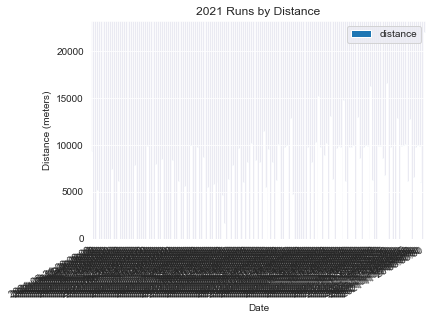

In [117]:
#new bar with 'off day' data
dist_plot = df_daily_training_log.plot.bar(y= 'distance', rot=0)

plt.title("2021 Runs by Distance")

plt.xlabel("Date")
plt.setp(dist_plot.get_xticklabels(), rotation=30, horizontalalignment='right')
    
plt.ylabel("Distance (meters)")


In [118]:
#resample dataset to show weekly data and "sum" features.
#goal is to show weekly total distance instead of daily
df_weekly_training_log = df_daily_training_log.resample('W').sum()
df_weekly_training_log.head(10)

,distance,average_heartrate,average_speed,average_cadence
date,,,,
2021-06-06,14548.0,357.4,6.141,152.9
2021-06-13,7458.6,172.6,2.872,75.9
2021-06-20,6103.5,172.4,3.098,80.4
2021-06-27,7834.7,176.6,3.060,78.8
2021-07-04,17847.4,361.3,6.029,154.6
2021-07-11,8488.2,174.6,2.902,78.4
2021-07-18,20199.4,533.2,8.781,234.0
2021-07-25,19792.9,343.5,5.819,157.1
2021-08-01,14226.1,351.3,5.983,157.2


In [119]:
#convert distance from meters to miles
df_weekly_training_log["miles"] = df_weekly_training_log["distance"] * 0.000621371
#add 'week' column for cleaner x-axis labels in visualization
df_weekly_training_log['week'] = (np.arange(len(df_weekly_training_log)))+1

In [120]:
df_weekly_training_log.head(10)

,distance,average_heartrate,average_speed,average_cadence,miles,week
date,,,,,,
2021-06-06,14548.0,357.4,6.141,152.9,9.039705,1
2021-06-13,7458.6,172.6,2.872,75.9,4.634558,2
2021-06-20,6103.5,172.4,3.098,80.4,3.792538,3
2021-06-27,7834.7,176.6,3.060,78.8,4.868255,4
2021-07-04,17847.4,361.3,6.029,154.6,11.089857,5
2021-07-11,8488.2,174.6,2.902,78.4,5.274321,6
2021-07-18,20199.4,533.2,8.781,234.0,12.551321,7
2021-07-25,19792.9,343.5,5.819,157.1,12.298734,8
2021-08-01,14226.1,351.3,5.983,157.2,8.839686,9


In [121]:
#new bar chart of weekly total mileage
#weekly_dist = df_weekly_training_log.plot.bar(x= 'week', y= 'miles', rot=0)
#plt.title("2021 Weekly Mileage")
#plt.legend().remove()

#plt.xlabel("Week")
    
#plt.ylabel("Distance (miles)")

#plt.savefig('weekly_miles.png')

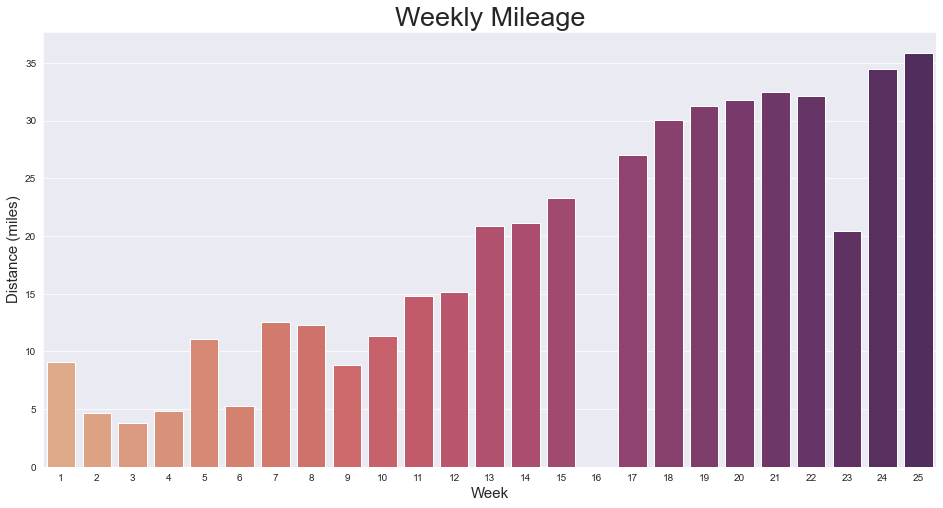

In [162]:
weekly_dist = df_weekly_training_log[['week','miles']]

pal = sns.color_palette("flare", len(weekly_dist))

wd_bar=sns.barplot(x=weekly_dist['week'], y=weekly_dist['miles'], palette=pal, errcolor=".2")
rcParams['figure.figsize'] = 16,8

#sns.set(font='sans serif')

wd_bar.set_xlabel("Week", fontsize = 15)
wd_bar.set_ylabel("Distance (miles)", fontsize = 15)
wd_bar.set_title('Weekly Mileage', fontsize = 27)

plt.savefig("weekly_miles.png")

plt.show()

In [124]:
#resampling dataset once more, but this time showing "average" of weekly features
#goal is to get average heartrate and average speed from an entire week of training
df_weekly_fitness_log = df_daily_training_log.resample('W').mean()
df_weekly_fitness_log.head(10)

,distance,average_heartrate,average_speed,average_cadence
date,,,,
2021-06-06,7274.000000,178.700000,3.07050,76.45
2021-06-13,7458.600000,172.600000,2.87200,75.90
2021-06-20,6103.500000,172.400000,3.09800,80.40
2021-06-27,7834.700000,176.600000,3.06000,78.80
2021-07-04,8923.700000,180.650000,3.01450,77.30
2021-07-11,8488.200000,174.600000,2.90200,78.40
2021-07-18,6733.133333,177.733333,2.92700,78.00
2021-07-25,9896.450000,171.750000,2.90950,78.55
2021-08-01,7113.050000,175.650000,2.99150,78.60


In [125]:
#created 'fitness index' which is a relative measure of fitness 
#calculated by dividing weekly average speed by average heartrate
df_weekly_fitness_log["fit_index"] = df_weekly_fitness_log['average_speed']/df_weekly_fitness_log['average_heartrate']*10

In [126]:
df_weekly_fitness_log.head(10)

,distance,average_heartrate,average_speed,average_cadence,fit_index
date,,,,,
2021-06-06,7274.000000,178.700000,3.07050,76.45,0.171824
2021-06-13,7458.600000,172.600000,2.87200,75.90,0.166396
2021-06-20,6103.500000,172.400000,3.09800,80.40,0.179698
2021-06-27,7834.700000,176.600000,3.06000,78.80,0.173273
2021-07-04,8923.700000,180.650000,3.01450,77.30,0.166870
2021-07-11,8488.200000,174.600000,2.90200,78.40,0.166208
2021-07-18,6733.133333,177.733333,2.92700,78.00,0.164685
2021-07-25,9896.450000,171.750000,2.90950,78.55,0.169403
2021-08-01,7113.050000,175.650000,2.99150,78.60,0.170310


In [127]:
#add 'week' column for cleaner x-axis labels in visualization
df_weekly_fitness_log['week'] = (np.arange(len(df_weekly_fitness_log)))+1
df_weekly_fitness_log

,distance,average_heartrate,average_speed,average_cadence,fit_index,week
date,,,,,,
2021-06-06,7274.000000,178.700000,3.070500,76.45,0.171824,1
2021-06-13,7458.600000,172.600000,2.872000,75.90,0.166396,2
2021-06-20,6103.500000,172.400000,3.098000,80.40,0.179698,3
2021-06-27,7834.700000,176.600000,3.060000,78.80,0.173273,4
2021-07-04,8923.700000,180.650000,3.014500,77.30,0.166870,5
2021-07-11,8488.200000,174.600000,2.902000,78.40,0.166208,6
2021-07-18,6733.133333,177.733333,2.927000,78.00,0.164685,7
2021-07-25,9896.450000,171.750000,2.909500,78.55,0.169403,8
2021-08-01,7113.050000,175.650000,2.991500,78.60,0.170310,9


In [128]:
#fitness changes over time
weekly_fitness = df_weekly_fitness_log[['week','fit_index']]

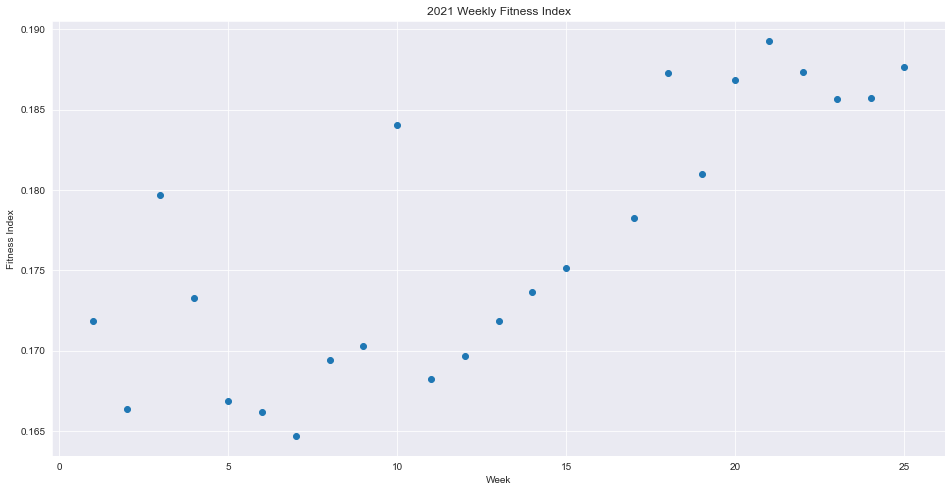

In [129]:
#fitness changes over time
weekly_fitness = df_weekly_fitness_log[['week','fit_index']]
x = weekly_fitness['week']
y = weekly_fitness['fit_index']

plt.title("2021 Weekly Fitness Index")
plt.xlabel("Week")
plt.ylabel("Fitness Index")
plt.scatter(x, y)

plt.show()

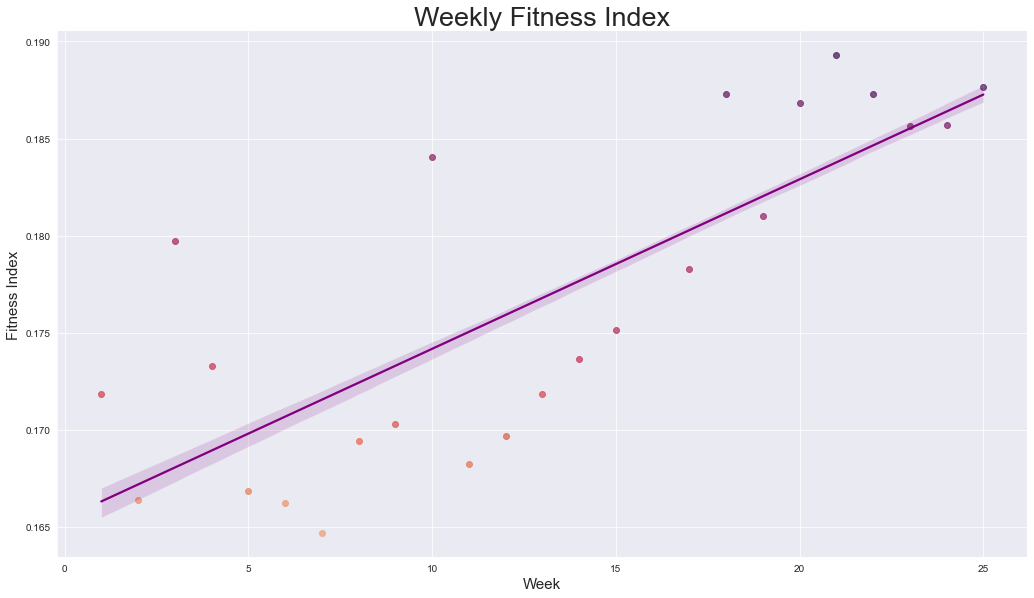

In [164]:
#Not liking the matplotlib scatterplot. 
#Trying similar visualization with seaborn.

weekly_fitness2 = sns.lmplot(x='week', y='fit_index', data=weekly_fitness, height=8, aspect=1.8, fit_reg=False, hue='fit_index', palette='flare', legend=False)
sns.regplot(x='week', y='fit_index', data=weekly_fitness, scatter=False, ax=weekly_fitness2.axes[0, 0], ci=25, color="purple")

weekly_fitness2.set_axis_labels("Week", "Fitness Index", fontsize = 15)

plt.title('Weekly Fitness Index', fontsize = 27)

plt.savefig('weekly_fitness.png', bbox_inches='tight')

plt.show()

In [147]:
#I'm similarly interested in changes in my average weekly cadence over time
df_weekly_fitness_log['avg_spm'] = df_weekly_fitness_log['average_cadence']*2

weekly_cadence = df_weekly_fitness_log[['week','avg_spm']]

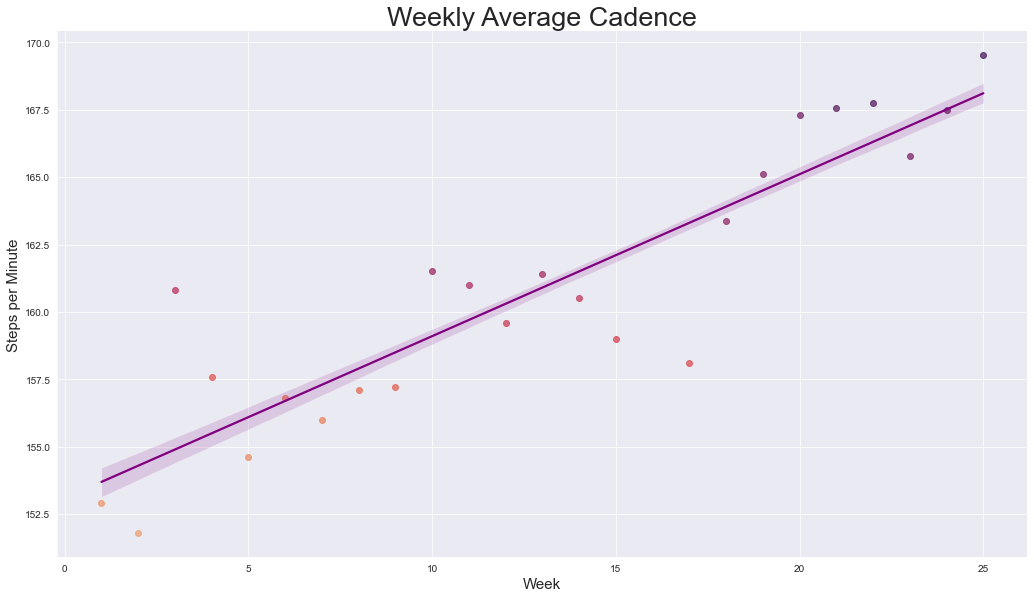

In [165]:
weekly_cadence_plt = sns.lmplot(x='week', y='avg_spm', data=weekly_cadence, height=8, aspect=1.8, fit_reg=False, hue='avg_spm', palette='flare', legend=False)
sns.regplot(x='week', y='avg_spm', data=weekly_cadence, scatter=False, ax=weekly_cadence_plt.axes[0, 0], ci=40, color="purple")


weekly_cadence_plt.set_axis_labels("Week", "Steps per Minute", fontsize = 15)

plt.title('Weekly Average Cadence', fontsize = 27)

plt.savefig('weekly_cadence.png', bbox_inches='tight')

plt.show()